In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def analytic_flexure(x, Te, v0, rhoi=1.0e3):    
    E = 1.0e11 # Módulo de Young [Pa]
    v = 0.25 # Coeficiente de Poisson
    g = 9.8 # Aceleração da gravidade [m/s²]

    rhom =  3300 # Densidade do manto

    D = E*Te**3/(12*(1-v**2))

    alpha = np.power(4*D/((rhom-rhoi)*g), 0.25)

    w0 = v0*alpha**3/(8*D)

    xa = np.abs(x)

    w = w0*np.exp(-xa/alpha)*(np.cos(xa/alpha)+np.sin(xa/alpha))
    return w

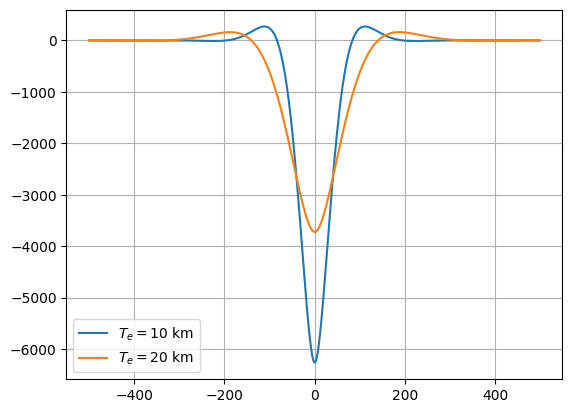

In [35]:
x = np.arange(-500e3, 500.0e3,1000)

Te = 10e3 # Espessura elástica efetiva
v0 = -1.0e13

w1 = analytic_flexure(x,Te,v0) # Vertical movement



Te2 = 20e3 # Espessura elástica efetiva
w2 = analytic_flexure(x,Te2,v0)



plt.plot(x/1000, w1, label="$T_e = 10$ km")

plt.plot(x/1000, w2, label="$T_e = 20$ km")
plt.grid()
plt.legend()

### Fourth derivative of w in finite differences

$ \frac{\delta ^4w}{\delta x^4} = \frac{W_{i+2}-4W_{i+1}+6W_i-4W_{i-1}+W_{i-2}}{\Delta x^4}$

fourth_derivative = (W[i+2] - 4*W[i+1] + 6*W[i] - 4*W[i-1] + W[i-2]) / delta_x**4

# Implement numerical metohd for flexure

In [36]:
def numeric_flexure(x,te,p, rhoi=1.0e3):
    dx = x[1]-x[0]

    E = 1.0e11 # Módulo de Young [Pa]
    v = 0.25 # Coeficiente de Poisson
    g = 9.8 # Aceleração da gravidade [m/s²]

    rhom =  3300 # Densidade do manto
    drho = rhom - rhoi
    D = E*te**3/(12*(1-v**2))

    n = np.size(x)

    A = np.zeros((n,n))

    A[range(n), range(n)] = 6*D + dx**4*drho*g

    A[range(n-1), range(1,n)] = -4*D
    A[range(1,n), range(n-1)] = -4*D
    
    A[range(n-2), range(2,n)] = D
    A[range(2,n), range(n-2)] = D

    q = p*dx**4

    w = np.linalg.solve(A,q)

    return w

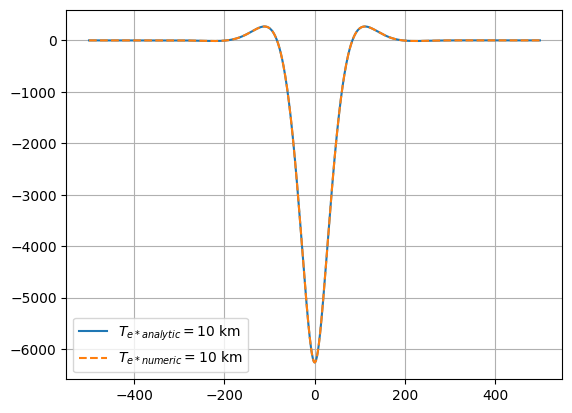

In [37]:
x = np.arange(-500e3, 500.0e3,1000.0)

Te = 10.0e3 # Espessura elástica efetiva
v0_linear = -1.0e13

wan = analytic_flexure(x,Te,v0_linear) # Vertical movement

plt.plot(x/1000, wan, label="$T_{e-analytic}= 10$ km")

dx = x[1]-x[0]
p = x*0

p[x==0] = v0_linear/dx
w_num = numeric_flexure(x,Te,p)

plt.plot(x/1000, w_num, "--" ,label="$T_{e-numeric} = 10$ km")
plt.grid()
plt.legend()

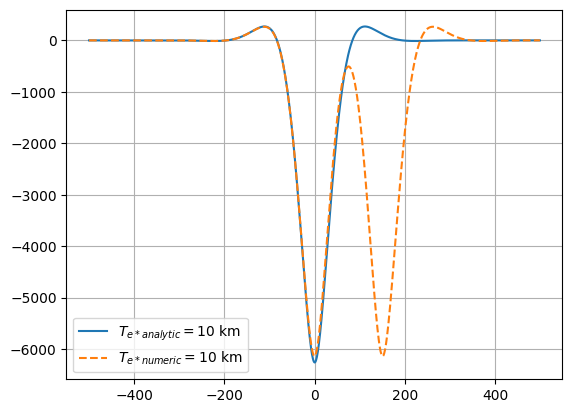

In [38]:
x = np.arange(-500e3, 500.0e3,1000.0)

Te = 10.0e3 # Espessura elástica efetiva
v0_linear = -1.0e13

wan = analytic_flexure(x,Te,v0_linear) # Vertical movement

plt.plot(x/1000, wan, label="$T_{e-analytic}= 10$ km")

dx = x[1]-x[0]
p = x*0

p[x==0] = v0_linear/dx

p[x==150e3] = v0_linear/dx
w_num = numeric_flexure(x,Te,p)

plt.plot(x/1000, w_num, "--" ,label="$T_{e-numeric} = 10$ km")
plt.grid()
plt.legend()

# Plateau flexure

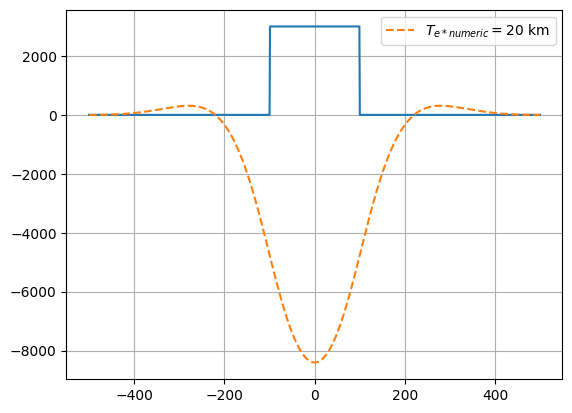

In [39]:
x = np.arange(-500e3, 500.0e3,1000.0)
h = x*0

cond = (x>-100.0e3)&(x<100.0e3)

h[cond] = 3.0e3

rhoc = 2700.0
g = 9.8 # Aceleração da gravidade [m/s²]
p = -h*rhoc*g

w_num = numeric_flexure(x, 20e3, p, 2400.0)

plt.plot(x/1000, h)
plt.plot(x/1000, w_num, "--" ,label="$T_{e-numeric} = 20$ km")
plt.grid()
plt.legend()